In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

In [2]:
# reading_data
df = pd.read_excel('Raw data .xlsx')

In [3]:
df.head()

,Transaction ID,Partner bank,RFI entity,Account type,Account created date,Amount (USD),Transfer Status,RFI Theme,Customer Address Country,Recipient Country,Transaction Purpose,Previous Suspensions,Account status
0,1,Bank A,Wise Customer,Business,2022-12-01,2000,Suspended,Sanctions,US,Germany,Family support,No,Active
1,2,Bank A,Wise Customer,Business,2023-01-10,22000,Not Suspended,AML,UK,US,Payment for services,Yes,Deactivated
2,3,Bank B,Recipient,Business,2024-01-27,5000,Suspended,Sanctions,Mexico,Italy,Investment,Yes,Active
3,4,Bank A,Wise Customer,Individual,2017-06-01,2500,Not Suspended,AML,India,UAE,Family support,Yes,Deactivated
4,5,Bank C,Recipient,Business,2013-02-13,3000,Not Suspended,AML,France,Mexico,Payment for services,No,Active


Reviewing the dataset to understand its structure and contents

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Transaction ID            100 non-null    int64         
 1   Partner bank              100 non-null    object        
 2   RFI entity                100 non-null    object        
 3   Account type              100 non-null    object        
 4   Account created date      100 non-null    datetime64[ns]
 5   Amount (USD)              100 non-null    int64         
 6   Transfer Status           100 non-null    object        
 7   RFI Theme                 100 non-null    object        
 8   Customer Address Country  100 non-null    object        
 9   Recipient Country         100 non-null    object        
 10  Transaction Purpose       100 non-null    object        
 11  Previous Suspensions      100 non-null    object        
 12  Account status         

In [5]:
df.duplicated().sum()

0

In [6]:
# replacing spaces with underscores and converting column names to lowercase for consistency
df.columns = df.columns.str.replace(' ', '_').str.lower()
df.head()

,transaction_id,partner_bank,rfi_entity,account_type,account_created_date,amount_(usd),transfer_status,rfi_theme,customer_address_country,recipient_country,transaction_purpose,previous_suspensions_,account_status
0,1,Bank A,Wise Customer,Business,2022-12-01,2000,Suspended,Sanctions,US,Germany,Family support,No,Active
1,2,Bank A,Wise Customer,Business,2023-01-10,22000,Not Suspended,AML,UK,US,Payment for services,Yes,Deactivated
2,3,Bank B,Recipient,Business,2024-01-27,5000,Suspended,Sanctions,Mexico,Italy,Investment,Yes,Active
3,4,Bank A,Wise Customer,Individual,2017-06-01,2500,Not Suspended,AML,India,UAE,Family support,Yes,Deactivated
4,5,Bank C,Recipient,Business,2013-02-13,3000,Not Suspended,AML,France,Mexico,Payment for services,No,Active


In [7]:
df.rename(columns={'previous_suspensions_': 'previous_suspensions', 'amount_(usd)': 'amount_usd'}, inplace=True)
df.head()

,transaction_id,partner_bank,rfi_entity,account_type,account_created_date,amount_usd,transfer_status,rfi_theme,customer_address_country,recipient_country,transaction_purpose,previous_suspensions,account_status
0,1,Bank A,Wise Customer,Business,2022-12-01,2000,Suspended,Sanctions,US,Germany,Family support,No,Active
1,2,Bank A,Wise Customer,Business,2023-01-10,22000,Not Suspended,AML,UK,US,Payment for services,Yes,Deactivated
2,3,Bank B,Recipient,Business,2024-01-27,5000,Suspended,Sanctions,Mexico,Italy,Investment,Yes,Active
3,4,Bank A,Wise Customer,Individual,2017-06-01,2500,Not Suspended,AML,India,UAE,Family support,Yes,Deactivated
4,5,Bank C,Recipient,Business,2013-02-13,3000,Not Suspended,AML,France,Mexico,Payment for services,No,Active


Let's start the analysis

Let's look into the transfer status of different types of RFI

In [8]:
df.groupby('rfi_theme', as_index=False).transfer_status.value_counts()

,rfi_theme,transfer_status,count
0,AML,Not Suspended,50
1,Sanctions,Suspended,50


In [9]:
# creating contingency tables for statistical tests
bank = pd.crosstab(df['partner_bank'], df['transfer_status'])
bank

transfer_status,Not Suspended,Suspended
partner_bank,,
Bank A,16,21
Bank B,16,13
Bank C,18,16


In [10]:
# performing chi-square tests for independence
chi2, p, dof, expected = stats.chi2_contingency(bank)

# results of the tests
print(p.round(3))

0.576


It means that there is no statistical difference between the banks

In [11]:
df.groupby('rfi_entity').transfer_status.value_counts()

rfi_entity     transfer_status
Recipient      Suspended          25
Recipient      Suspended          23
               Not Suspended       2
Wise Customer  Not Suspended      48
               Suspended           2
Name: count, dtype: int64

In [12]:
df.rfi_entity.unique()

array(['Wise Customer', 'Recipient ', 'Recipient'], dtype=object)

Fix the name of the RFI entity.

In [13]:
df['rfi_entity'] = df['rfi_entity'].str.strip()
df.rfi_entity.unique()

array(['Wise Customer', 'Recipient'], dtype=object)

In [14]:
df.loc[(df.rfi_entity == 'Wise Customer') & (df.transfer_status == 'Suspended')]

,transaction_id,partner_bank,rfi_entity,account_type,account_created_date,amount_usd,transfer_status,rfi_theme,customer_address_country,recipient_country,transaction_purpose,previous_suspensions,account_status
0,1,Bank A,Wise Customer,Business,2022-12-01,2000,Suspended,Sanctions,US,Germany,Family support,No,Active
5,6,Bank A,Wise Customer,Business,2021-02-14,4000,Suspended,Sanctions,UAE,UK,Investment,Yes,Active


In [15]:
df.groupby('rfi_entity').transfer_status.value_counts()

rfi_entity     transfer_status
Recipient      Suspended          48
               Not Suspended       2
Wise Customer  Not Suspended      48
               Suspended           2
Name: count, dtype: int64

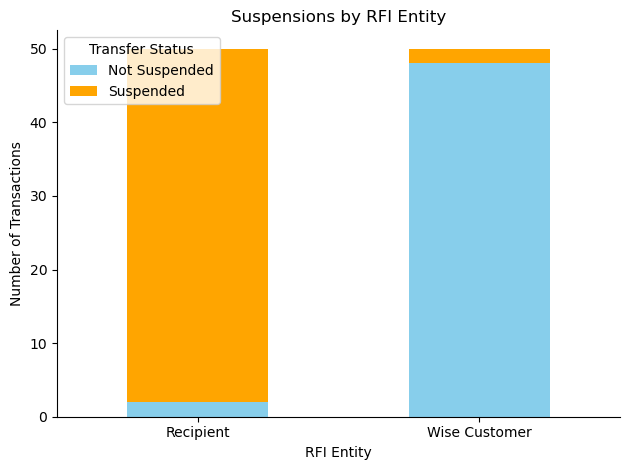

In [16]:
table = pd.crosstab(df['rfi_entity'], df['transfer_status'])

table.plot(
    kind='bar',
    stacked=True,
color = ('skyblue', 'orange'))

plt.title('Suspensions by RFI Entity')
plt.xlabel('RFI Entity')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=0)
plt.legend(title='Transfer Status')
plt.tight_layout()
sns.despine()
plt.savefig("RFI_Entity.png", format="png", dpi=300)
plt.show()

In [17]:
# creating contingency tables for statistical tests
account = pd.crosstab(df['account_type'], df['transfer_status'])
account

transfer_status,Not Suspended,Suspended
account_type,,
Business,30,27
Individual,20,23


In [18]:
# performing chi-square tests for independence
chi2, p, dof, expected = stats.chi2_contingency(account)

# results of the tests
print(p.round(3))

0.686


No statistical difference between the account types

In [19]:
# creating contingency tables for statistical tests
status = pd.crosstab(df['account_status'], df['transfer_status'])
status

transfer_status,Not Suspended,Suspended
account_status,,
Active,35,46
Deactivated,15,4


In [20]:
# performing chi-square tests for independence
chi2, p, dof, expected = stats.chi2_contingency(status)

# results of the tests
print(p.round(3))

0.011


Deactivated accounts are suspended less often

In [21]:
df.loc[df.account_status == 'Deactivated']

,transaction_id,partner_bank,rfi_entity,account_type,account_created_date,amount_usd,transfer_status,rfi_theme,customer_address_country,recipient_country,transaction_purpose,previous_suspensions,account_status
1,2,Bank A,Wise Customer,Business,2023-01-10,22000,Not Suspended,AML,UK,US,Payment for services,Yes,Deactivated
3,4,Bank A,Wise Customer,Individual,2017-06-01,2500,Not Suspended,AML,India,UAE,Family support,Yes,Deactivated
6,7,Bank A,Wise Customer,Individual,2016-05-03,1800,Not Suspended,AML,UK,Philippines,Remittance,Yes,Deactivated
8,9,Bank B,Wise Customer,Business,2017-06-05,7000,Not Suspended,AML,Mexico,Canada,Investment,Yes,Deactivated
11,12,Bank A,Recipient,Individual,2015-08-04,2300,Suspended,Sanctions,UAE,Saudi Arabia,Investment,Yes,Deactivated
26,27,Bank A,Wise Customer,Business,2019-12-11,5400,Not Suspended,AML,UK,Mexico,Investment,No,Deactivated
32,33,Bank A,Wise Customer,Business,2024-10-15,4300,Not Suspended,AML,UAE,South Africa,Investment,Yes,Deactivated
38,39,Bank C,Wise Customer,Individual,2024-05-08,2900,Not Suspended,AML,UK,Japan,Investment,Yes,Deactivated
44,45,Bank B,Wise Customer,Individual,2015-09-06,10000,Not Suspended,AML,UK,Nigeria,Investment,Yes,Deactivated
46,47,Bank C,Wise Customer,Individual,2020-01-22,2500,Not Suspended,AML,Canada,South Africa,Payment for services,Yes,Deactivated


In [22]:
# creating contingency tables
purpose = pd.crosstab(df['transaction_purpose'], df['transfer_status'])
purpose

transfer_status,Not Suspended,Suspended
transaction_purpose,,
Family support,12,16
Investment,14,17
Payment for services,17,15
Remittance,7,2


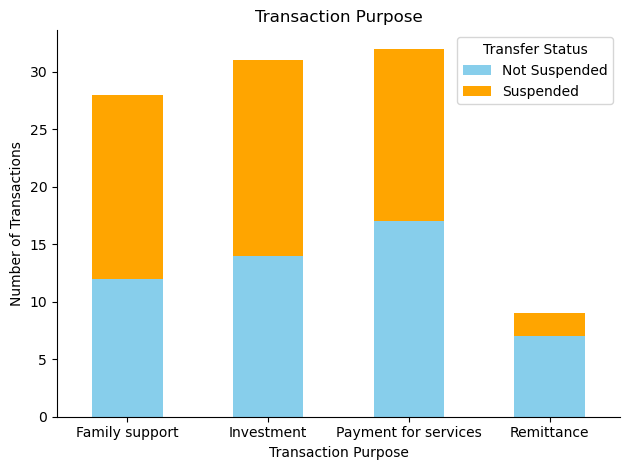

In [23]:
purpose.plot(
    kind='bar',
    stacked=True,
color = ('skyblue', 'orange'))

plt.title('Transaction Purpose')
plt.xlabel('Transaction Purpose')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=0)
plt.legend(title='Transfer Status')
plt.tight_layout()
sns.despine()
plt.savefig("purpose.png", format="png", dpi=300)
plt.show()

In [24]:
customer = (
    df
    .groupby('customer_address_country', as_index=False).transfer_status.value_counts(normalize = True)
    .query('transfer_status == "Suspended"').sort_values('proportion', ascending=False)
)
customer.proportion = customer.proportion.mul(100).round(2)
customer.rename(columns={'proportion': 'percentage'}, inplace=True)
customer

,customer_address_country,transfer_status,percentage
10,UAE,Suspended,76.47
8,Mexico,Suspended,61.54
6,India,Suspended,57.14
15,US,Suspended,50.00
5,Germany,Suspended,42.86
13,UK,Suspended,38.10
3,France,Suspended,33.33
1,Canada,Suspended,16.67


In [25]:
recipient_country = (
    df.groupby('recipient_country', as_index=False)
    .size()
    .rename(columns={'size': 'transaction_count'})
)

# step 2: Filter countries with more than 5 transactions
recipient_modified = recipient_country.loc[recipient_country['transaction_count'] > 5, 'recipient_country']

# step 3: Filter the original DataFrame and compute proportions for 'Suspended'
recipient = (
    df[df['recipient_country'].isin(recipient_modified)]
    .groupby('recipient_country', as_index=False).transfer_status.value_counts(normalize = True)
    .query('transfer_status == "Suspended"').sort_values('proportion', ascending=False)
)
recipient.proportion = recipient.proportion.mul(100).round(2)
recipient.rename(columns={'proportion': 'percentage'}, inplace=True)
recipient

recipient

,recipient_country,transfer_status,percentage
8,Italy,Suspended,100.00
4,Germany,Suspended,85.71
6,India,Suspended,66.67
15,UK,Suspended,55.56
3,France,Suspended,50.00
14,UAE,Suspended,42.86
10,Japan,Suspended,33.33
12,South Africa,Suspended,16.67
1,Brazil,Suspended,12.50


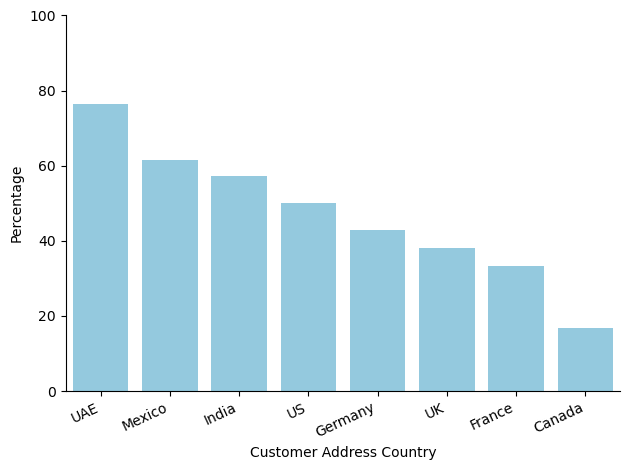

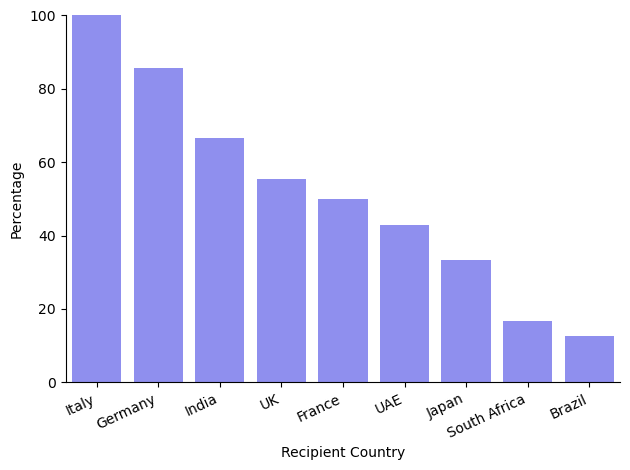

In [26]:
sns.barplot(data=customer, x='customer_address_country', y='percentage', color='skyblue')
sns.despine()
plt.ylim(0, 100)  # Set y-axis limits to 0-100%
plt.xlabel('Customer Address Country')
plt.ylabel('Percentage')
plt.xticks(rotation=25, ha='right')
plt.tight_layout()
plt.savefig('customer_country.png', format='png', dpi=300)
plt.show()

sns.barplot(data=recipient, x='recipient_country', y='percentage', color='blue', alpha = 0.5)
sns.despine()
plt.ylim(0, 100)  # Set y-axis limits to 0-100%
plt.xlabel('Recipient Country')
plt.ylabel('Percentage')
plt.xticks(rotation=25, ha='right')
plt.tight_layout()
plt.savefig('recipient_country.png', format='png', dpi=300)
plt.show()

In [27]:
df['year'] = df.account_created_date.dt.year

In [28]:
year = df.groupby('year', as_index=False).transfer_status.value_counts(normalize=True).query('transfer_status == "Suspended"').sort_values('proportion', ascending=False)
year.proportion = year.proportion.mul(100).round(2)
year.rename(columns={'proportion': 'percentage'}, inplace=True)
year 

,year,transfer_status,percentage
15,2021,Suspended,75.00
19,2023,Suspended,69.23
13,2020,Suspended,66.67
9,2018,Suspended,55.56
5,2016,Suspended,50.00
22,2024,Suspended,50.00
4,2015,Suspended,44.44
8,2017,Suspended,42.86
2,2014,Suspended,33.33
18,2022,Suspended,33.33


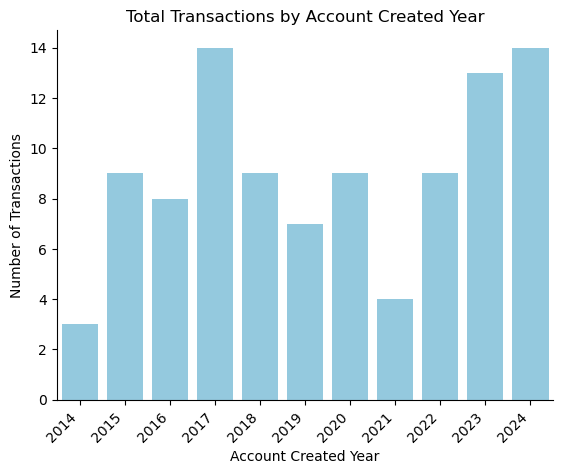

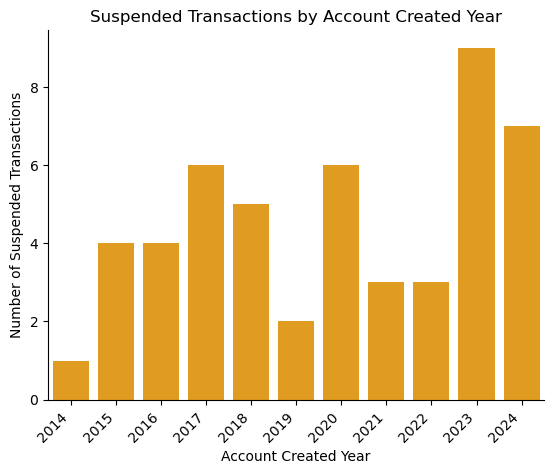

In [29]:
sns.countplot(data=df[df.year!=2013], x='year', color='skyblue')
sns.despine()
plt.title('Total Transactions by Account Created Year')
plt.ylabel('Number of Transactions')
plt.xlabel('Account Created Year')
plt.xticks(rotation=45, ha='right')
plt.show()

sns.countplot(data=df[df.transfer_status == 'Suspended'], x='year', color = 'orange')
sns.despine()
plt.title('Total Transactions by Account Created Year')
plt.title('Suspended Transactions by Account Created Year')
plt.ylabel('Number of Suspended Transactions')
plt.xlabel('Account Created Year')
plt.xticks(rotation=45, ha='right')
plt.show()

In [30]:
bins = [1500, 3000, 4500, 6000, 300000]
labels = ['1500-3000', '3000-4500', '4500-6000', '6000+']
USD = df.loc[df['transfer_status'] == 'Suspended'].amount_usd
binned_first = pd.cut(USD, bins, labels=labels)

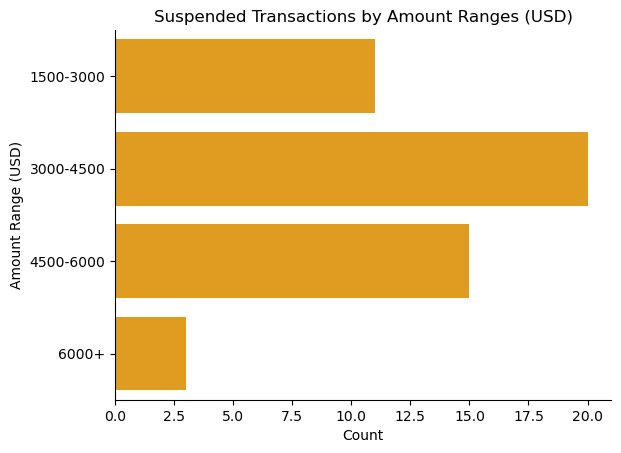

In [31]:
sns.countplot(y=binned_first, color='orange')

plt.title('Suspended Transactions by Amount Ranges (USD)')
plt.xlabel('Count')
plt.ylabel('Amount Range (USD)')
plt.xticks()
plt.yticks()
sns.despine()

plt.show()

In [32]:
USD_x = df['amount_usd']
binned_second = pd.cut(USD_x, bins, labels=labels)

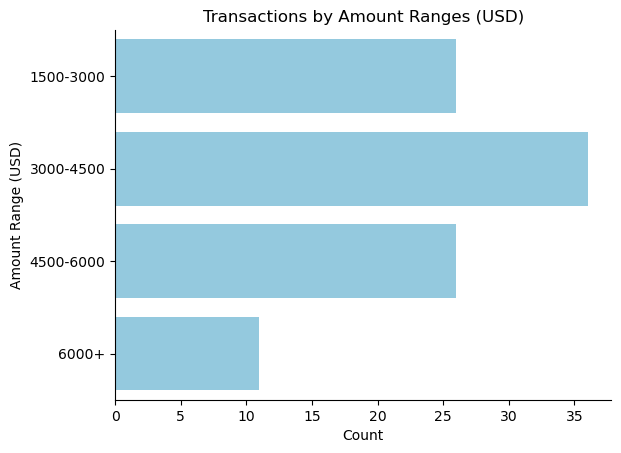

In [33]:
sns.countplot(y=binned_second, color='skyblue')

plt.title('Transactions by Amount Ranges (USD)')
plt.xlabel('Count')
plt.ylabel('Amount Range (USD)')
plt.xticks()
plt.yticks()
sns.despine()

plt.show()

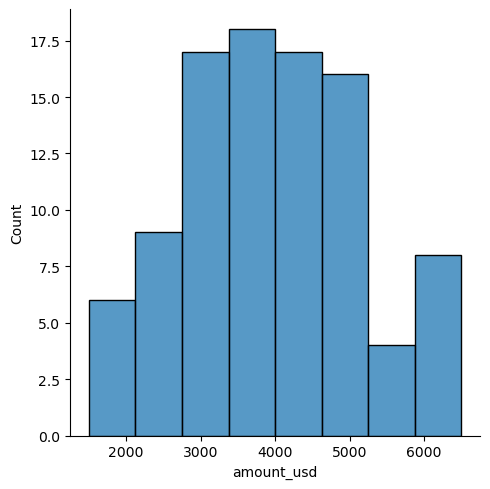

In [34]:
sns.displot(USD_x[USD_x < 7000])

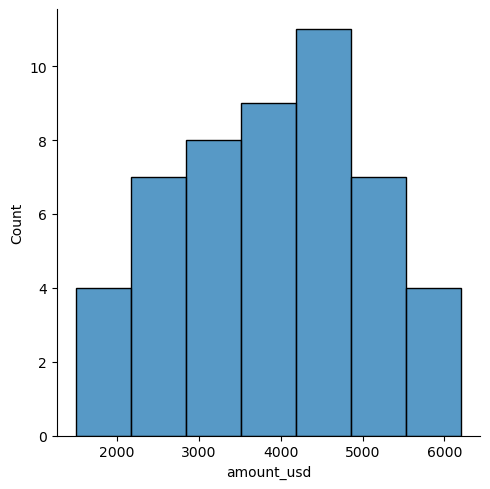

In [35]:
sns.displot(USD)

In [36]:
# creating contingency tables
contingency_table = pd.crosstab(df['previous_suspensions'], df['transfer_status'])
contingency_table

transfer_status,Not Suspended,Suspended
previous_suspensions,,
No,40,14
Yes,10,36


In [37]:
# performing chi-square tests for independence
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# results of the tests
print(p.round(3))

0.0


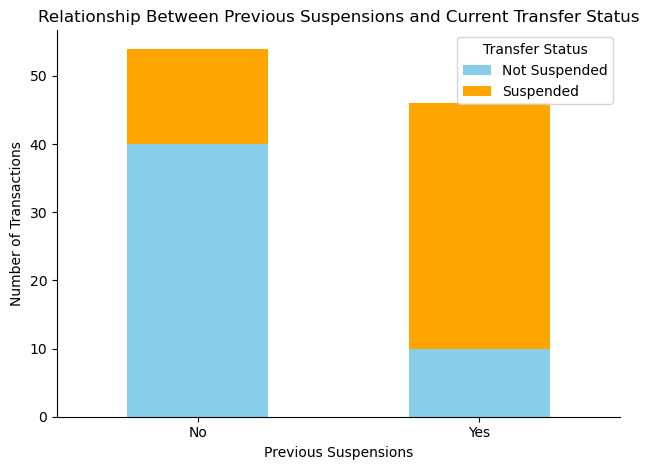

In [38]:
contingency_table.plot(
    kind='bar',
    stacked=True,
color = ('skyblue', 'orange'))

plt.title('Relationship Between Previous Suspensions and Current Transfer Status')
plt.xlabel('Previous Suspensions')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=0)
plt.legend(title='Transfer Status')
plt.tight_layout()
sns.despine()
plt.savefig("RFI_status.png", format="png", dpi=300)
plt.show()